

---



---


---



---


# **ASSIGNMENT CODE IS BELOW**


---



---


---



---






In [ ]:
# Imports and Setup
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier  # Corrected import
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.semi_supervised import SelfTrainingClassifier
from scipy.stats import loguniform, randint

# Load and prepare the dataset
df = pd.read_excel('/content/drive/MyDrive/MGT7216 - Data Mining Assignment 2/A_II_Emotion_Data_Student_Copy_Final.xlsx')
df = df.dropna(subset=['ID_', 'brand_name_', 'country_', 'star_rating_', 'emotions_', 'text_reviews_'])

# Text Data Pre-processing
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove words with 1 or 2 letters
    text = re.sub(r'[^a-z\s]', '', text)  # Keep only letters and spaces
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)
df['cleaned_text'] = df['text_reviews_'].apply(clean_text)

# Prepare data for modeling
X = df['cleaned_text']
y = df['emotions_']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text Analytics: Supervised & Semi-supervised Machine Learning
# Define pipelines for text processing and classification
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 3), min_df=1, max_df=0.8)),
    ('clf', SGDClassifier(loss='log', penalty='l2', alpha=1e-5, random_state=40))
])

# Supervised learning model training and evaluation
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Supervised SGDClassifier Evaluation:")
print(classification_report(y_test, y_pred))

# Semi-supervised learning with SelfTrainingClassifier
st_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 3), min_df=1, max_df=0.8)),
    ('clf', SelfTrainingClassifier(SGDClassifier(loss='log', penalty='l2', alpha=1e-5, random_state=42), threshold=0.8, verbose=True))
])
st_pipeline.fit(X_train, y_train)
y_pred_st = st_pipeline.predict(X_test)
print("Self-training Classifier Evaluation:")
print(classification_report(y_test, y_pred_st))

# Additional Experiments and Optimization (Randomized Search, Threshold Tuning, etc.)
# Randomized search to find the best parameters for semi-supervised model
param_dist = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'tfidf__max_df': loguniform(0.5, 0.9),
    'tfidf__min_df': randint(1, 10),
    'clf__base_estimator__alpha': loguniform(1e-5, 1e-1),
    'clf__base_estimator__loss': ['hinge', 'log', 'modified_huber'],
    'clf__base_estimator__penalty': ['l2', 'l1', 'elasticnet'],
    'clf__threshold': [0.7, 0.8, 0.9]
}
random_search = RandomizedSearchCV(st_pipeline, param_distributions=param_dist, n_iter=100, cv=5, verbose=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
print("Best parameters found for Semi-supervised Model:\n", random_search.best_params_)
print("Best score:", random_search.best_score_)
y_pred = random_search.predict(X_test)
print("Optimized Semi-supervised Classifier Evaluation:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Supervised SGDClassifier Evaluation:
              precision    recall  f1-score   support

       anger       0.33      0.29      0.31         7
     disgust       0.36      0.62      0.46        13
        fear       0.62      0.50      0.55        16
         joy       0.83      0.87      0.85        23
     neutral       0.43      0.43      0.43        21
     sadness       0.58      0.46      0.51        24
    surprise       0.57      0.55      0.56        22

    accuracy                           0.56       126
   macro avg       0.53      0.53      0.52       126
weighted avg       0.57      0.56      0.56       126

Self-training Classifier Evaluation:
              precision    recall  f1-score   support

       anger       0.20      0.14      0.17         7
     disgust       0.32      0.62      0.42        13
        fear       0.82      0.56      0.67        16
         joy       0.95      0.87      0.91        23
     neutral       0.45      0.48      0.47        21
    

/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_self_training.py:212: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Best parameters found for Semi-supervised Model:
 {'clf__base_estimator__alpha': 0.005094242534741869, 'clf__base_estimator__loss': 'modified_huber', 'clf__base_estimator__penalty': 'l1', 'clf__threshold': 0.9, 'tfidf__max_df': 0.5250857406164392, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 3)}
Best score: 0.5588514851485148
Optimized Semi-supervised Classifier Evaluation:
               precision    recall  f1-score   support

       anger       0.75      0.43      0.55         7
     disgust       0.36      0.38      0.37        13
        fear       0.86      0.38      0.52        16
         joy       0.83      0.87      0.85        23
     neutral       0.54      0.71      0.61        21
     sadness       0.50      0.54      0.52        24
    surprise       0.70      0.73      0.71        22

    accuracy                           0.62       126
   macro avg       0.65      0.58      0.59       126
weighted avg       0.65      0.62      0.62       126



/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_self_training.py:212: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


# **Visuals**

Descriptive Statistics for Dataset Columns:
       star_rating_
count    627.000000
mean       3.251994
std        1.541847
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        5.000000


<ipython-input-65-fd72c1b8b723>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.countplot(x='star_rating_', data=df, palette='cool')


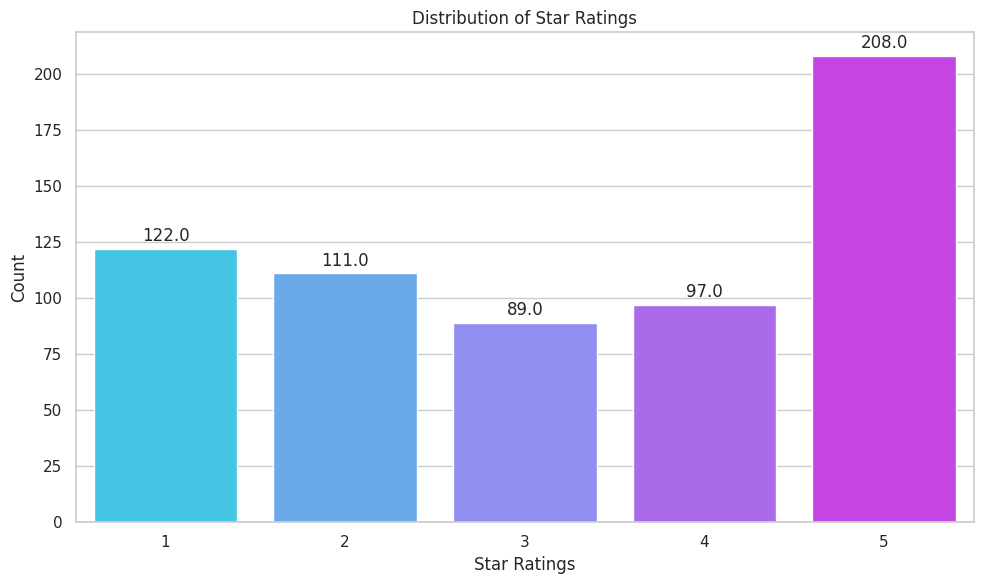

<ipython-input-65-fd72c1b8b723>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.countplot(x='emotions_', data=df, palette='cool', order=df['emotions_'].value_counts().index)


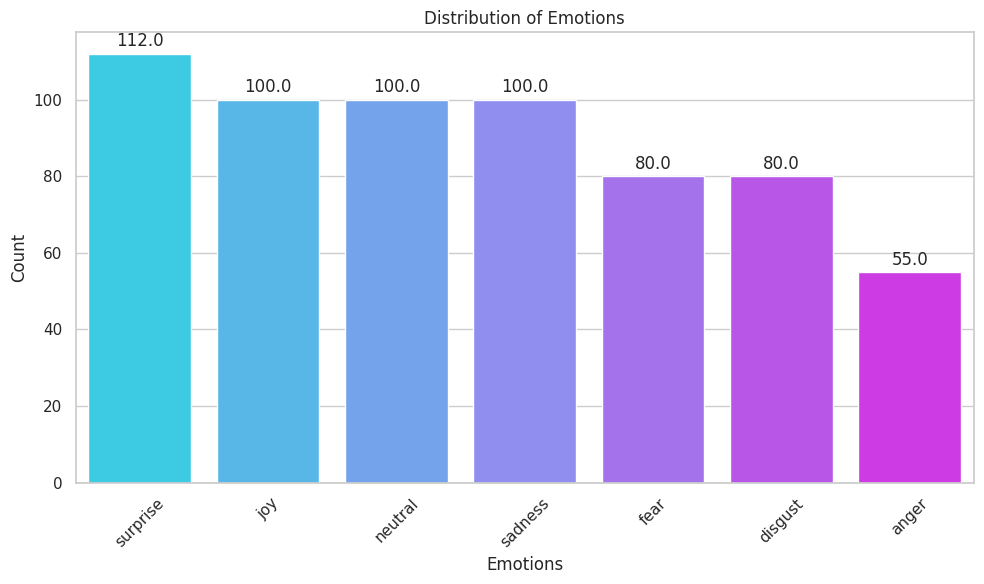

<ipython-input-65-fd72c1b8b723>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.countplot(y='brand_name_', data=df, palette='cool', order=df['brand_name_'].value_counts().index)


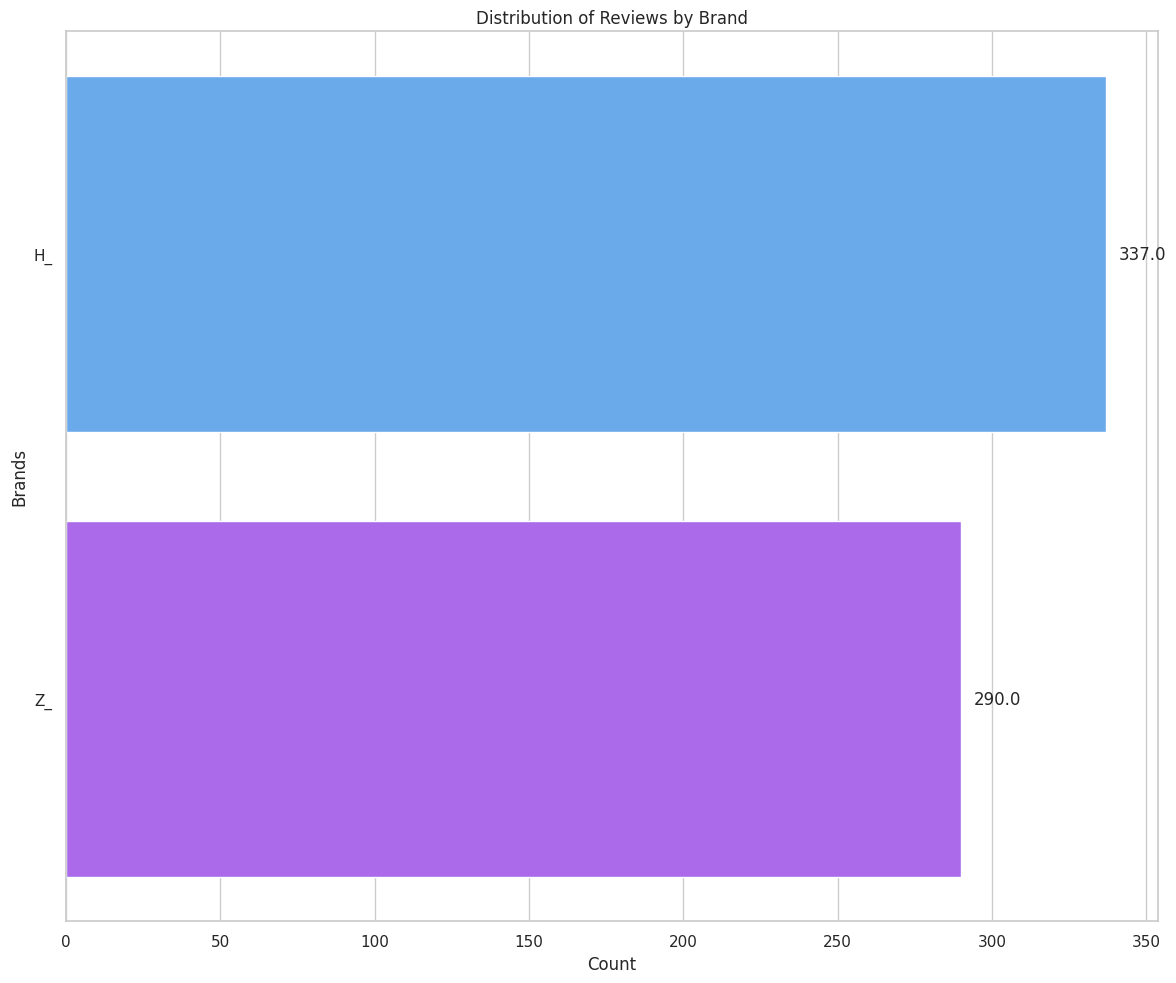

<ipython-input-65-fd72c1b8b723>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="emotions_", col="brand_name_", col_wrap=3,


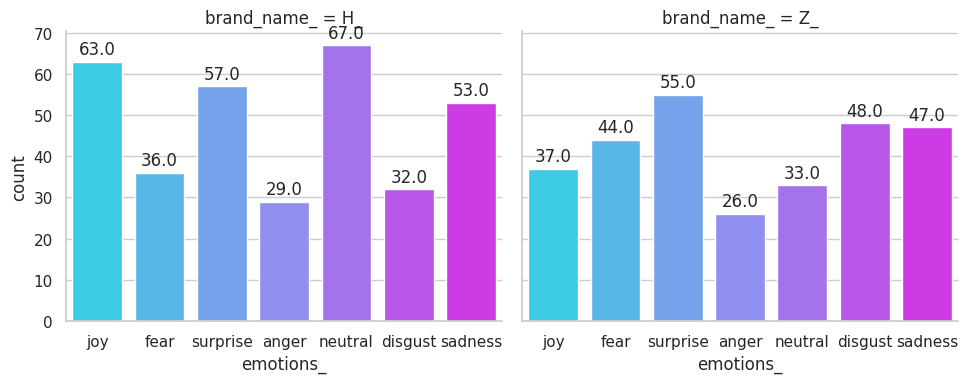

<ipython-input-65-fd72c1b8b723>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="star_rating_", col="brand_name_", col_wrap=3,


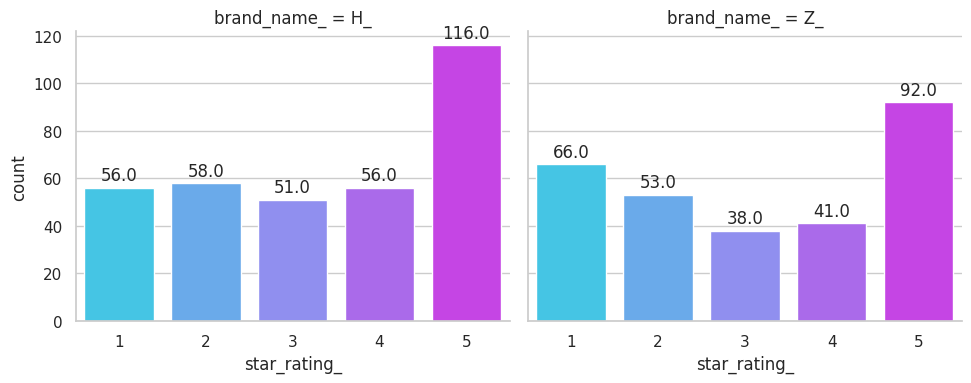

In [ ]:
# Import necessary visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

df.dropna(subset=['brand_name_', 'country_', 'star_rating_', 'emotions_'], inplace=True)

# Descriptive Statistics for Non-Text Review Columns
print("Descriptive Statistics for Dataset Columns:")
descriptive_stats = df[['brand_name_', 'country_', 'star_rating_', 'emotions_']].describe()
print(descriptive_stats)

# Visual Analytics: Distribution of Star Ratings
plt.figure(figsize=(10, 6))
bar_plot = sns.countplot(x='star_rating_', data=df, palette='cool')
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Count')
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')
plt.tight_layout()
plt.show()

# Visual Analytics: Distribution of Emotions
plt.figure(figsize=(10, 6))
bar_plot = sns.countplot(x='emotions_', data=df, palette='cool', order=df['emotions_'].value_counts().index)
plt.title('Distribution of Emotions')
plt.xticks(rotation=45)
plt.xlabel('Emotions')
plt.ylabel('Count')
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')
plt.tight_layout()
plt.show()

# Visual Analytics: Distribution of Reviews by Brand
plt.figure(figsize=(12, 10))
bar_plot = sns.countplot(y='brand_name_', data=df, palette='cool', order=df['brand_name_'].value_counts().index)
plt.title('Distribution of Reviews by Brand')
plt.xlabel('Count')
plt.ylabel('Brands')
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_width(), '.1f'),
                      (p.get_width(), p.get_y() + p.get_height() / 2.),
                      ha = 'left', va = 'center',
                      xytext = (9, 0),
                      textcoords = 'offset points')
plt.tight_layout()
plt.show()

# Visual Analytics: Emotion Distribution by Top Brands
g = sns.catplot(x="emotions_", col="brand_name_", col_wrap=3,
                data=df[df['brand_name_'].isin(df['brand_name_'].value_counts().index[:10])],
                kind="count", height=4, aspect=1.2, palette='cool')
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')
plt.show()

# Visual Analytics: Star Rating Distribution by Top Brands
g = sns.catplot(x="star_rating_", col="brand_name_", col_wrap=3,
                data=df[df['brand_name_'].isin(df['brand_name_'].value_counts().index[:10])],
                kind="count", height=4, aspect=1.2, palette='cool')
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')
plt.show()

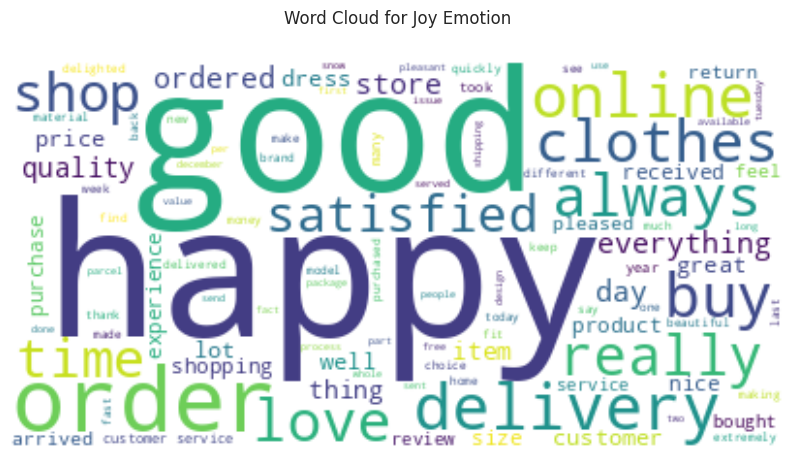

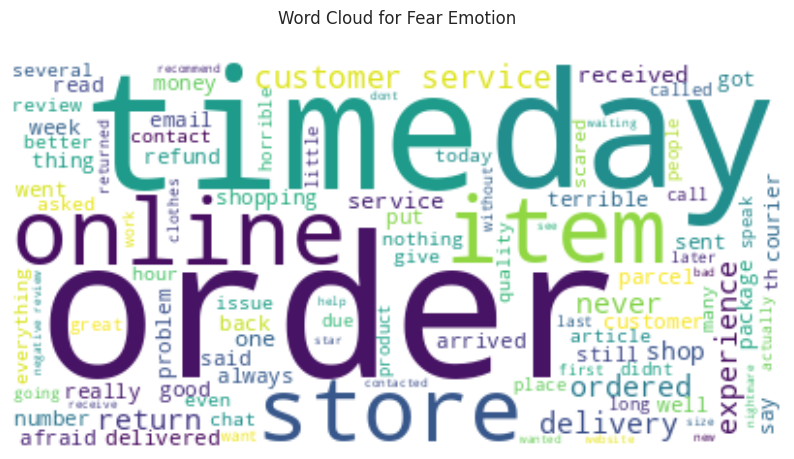

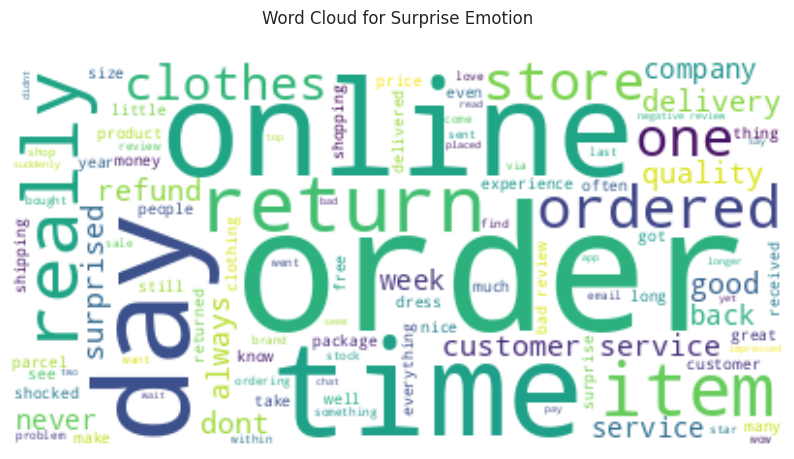

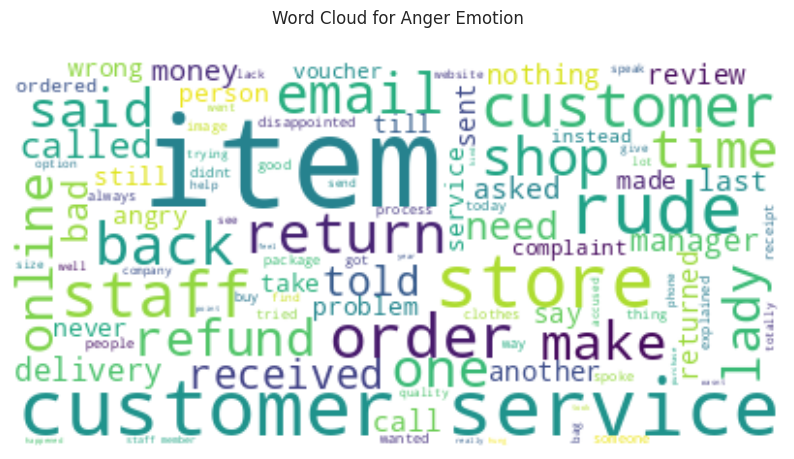

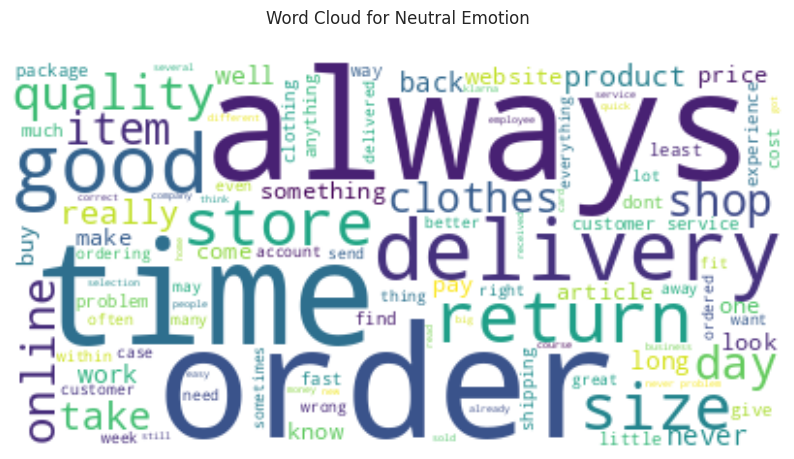

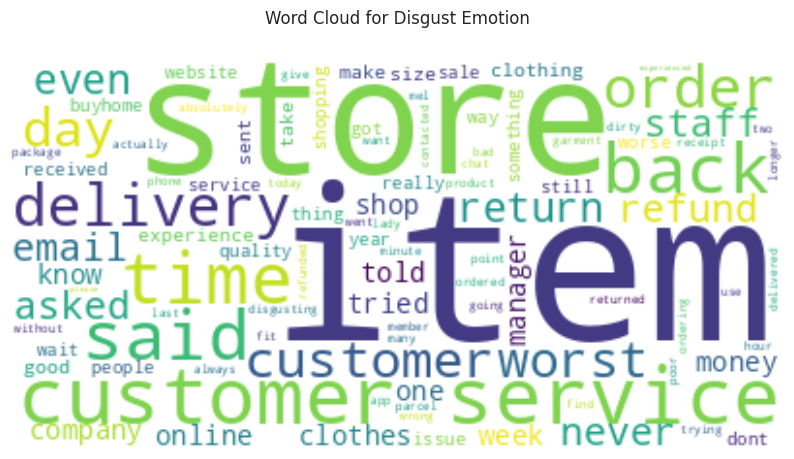

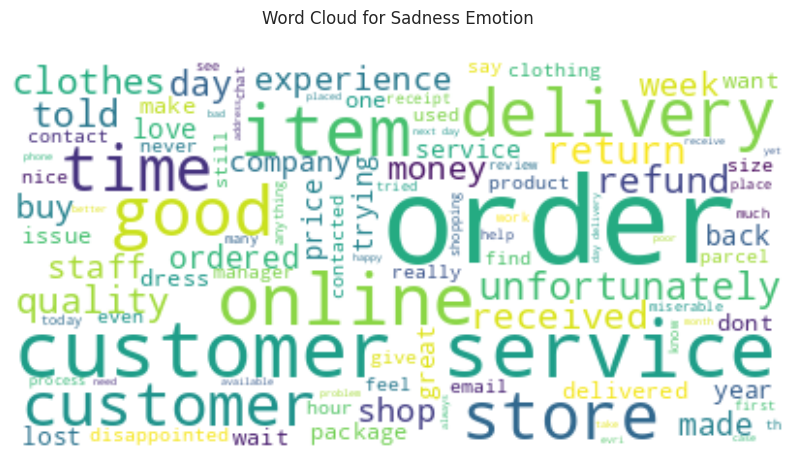

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'df' is your pre-processed DataFrame and it contains a 'cleaned_text' column for text data.
emotions = df['emotions_'].unique()

# Generate a word cloud for each emotion
for emotion in emotions:
    # Filter the DataFrame for the current emotion and concatenate the text
    text = ' '.join(review for review in df[df['emotions_'] == emotion]['cleaned_text'])
    wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(text)

    # Display the generated word cloud
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis labels
    plt.title(f'Word Cloud for {emotion.capitalize()} Emotion', pad=27)  # title hight
    plt.show()